# Introduction
This code demonstrates the process of clustering customers based on their features using **DBSCAN** which stands for **Density-Based Spatial Clustering of Applications with Noise**. The steps include data loading, exploration, visualization, clustering, and evaluation of the clustering results.

In [1]:
!pip install pyforest

  Preparing metadata (setup.py) ... - \ | done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14605 sha256=b56eb3616ef3b152fdea164e5698757026247407c37198685e2eec645a309766
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [2]:
# Import necessary libraries
import pyforest
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [3]:
# Load the dataset
df = pd.read_csv(r"/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

<IPython.core.display.Javascript object>

# Exploratory Data Analysis

In [4]:
# Display the first few rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

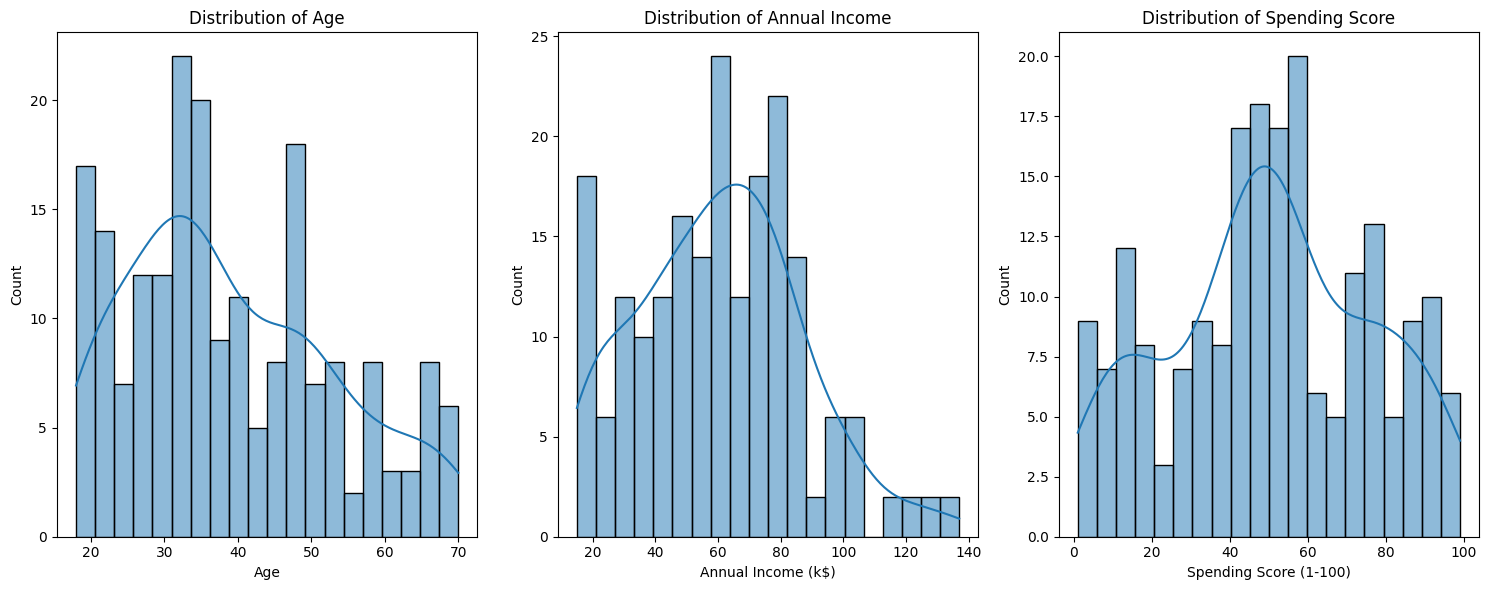

In [7]:
# Visualize the distribution of numerical features
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Distribution of Annual Income')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

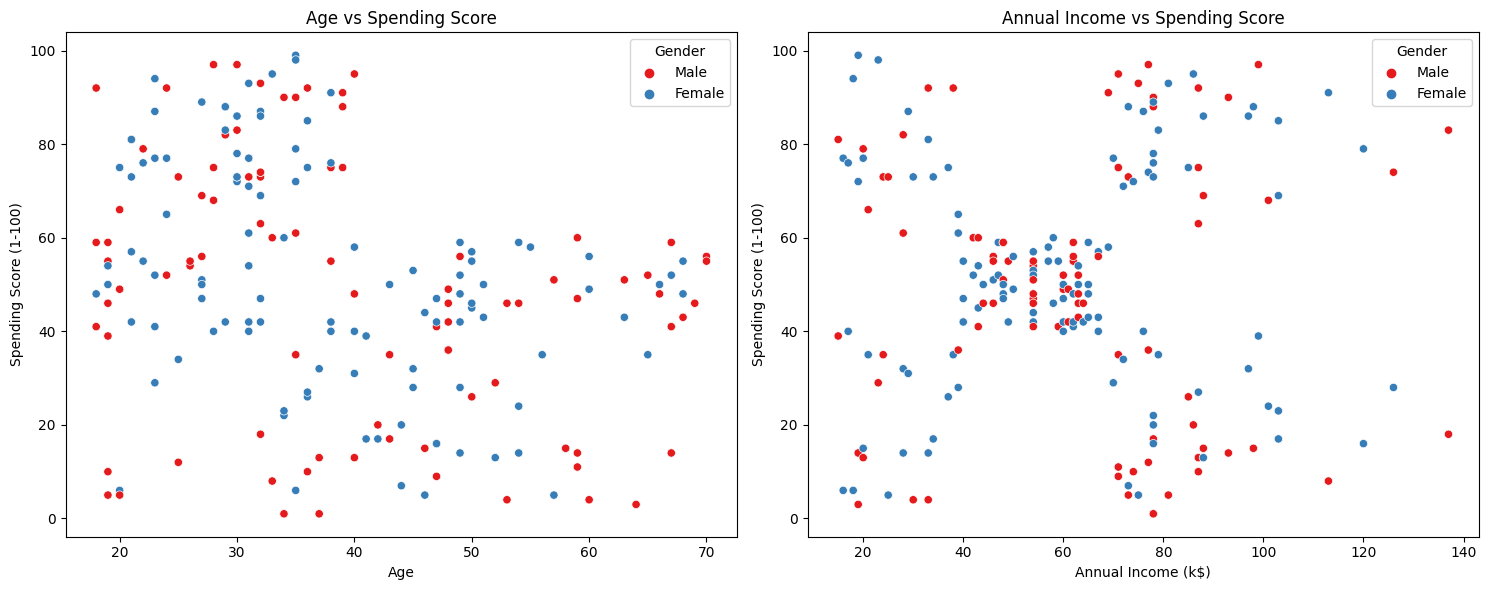

In [8]:
# Visualize relationships between features
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Gender', palette='Set1')
plt.title('Age vs Spending Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', palette='Set1')
plt.title('Annual Income vs Spending Score')

plt.tight_layout()
plt.show()

# Apply DBSCAN Clustering

In [9]:
# Selecting relevant features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(scaled_features)

silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

<IPython.core.display.Javascript object>

Silhouette Score: 0.18451372756506046


# Visualize the Clusters

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

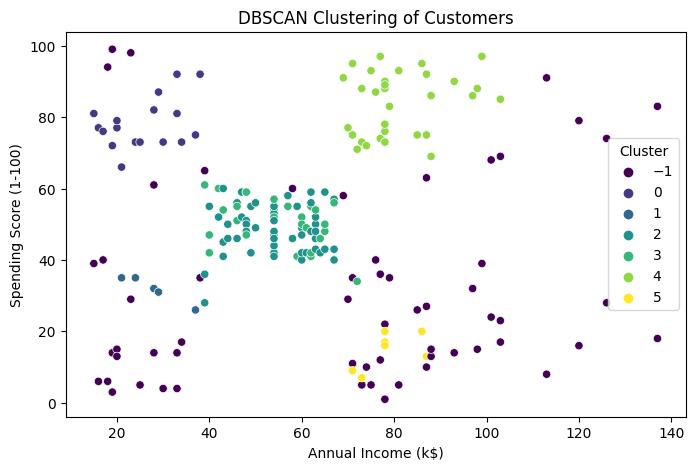

In [10]:
# Visualize the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster', palette='viridis')
plt.title('DBSCAN Clustering of Customers')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

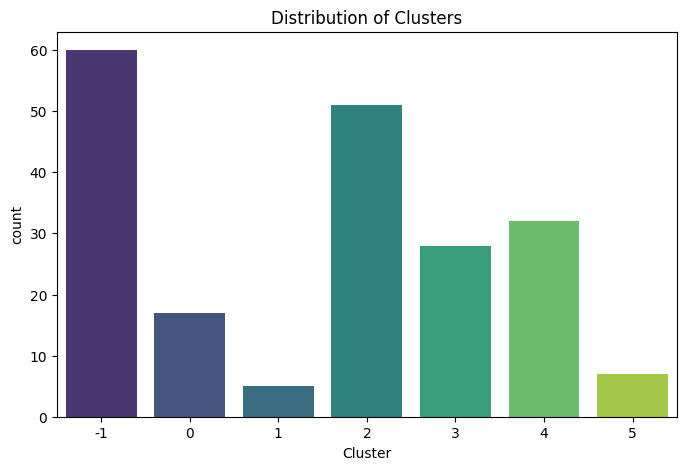

In [11]:
# Explore the distribution of clusters
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Distribution of Clusters')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

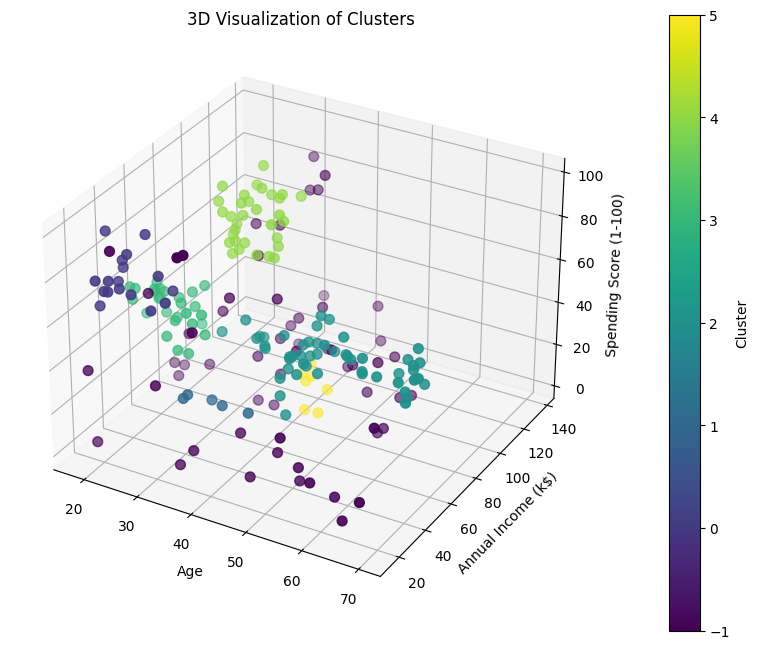

In [12]:
# Visualize the clusters in 3D (using first three features)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    xs=df['Age'],
    ys=df['Annual Income (k$)'],
    zs=df['Spending Score (1-100)'],
    c=df['Cluster'],
    cmap='viridis',
    s=50
)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Visualization of Clusters')

# Add a colorbar
colorbar = plt.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_label('Cluster')

plt.show()

# Conclusion

In conclusion, the application of DBSCAN (Density-Based Spatial Clustering of Applications with Noise) on customer data has provided valuable insights into distinct clusters within the dataset. The process involved loading and exploring the data, visualizing feature distributions, and ultimately applying DBSCAN for clustering.

# Made by: Abdelrahman Eldaba